# Project: Portfolio Optimization and Reinforcement Learning
## Authors: Hung Tran & Asha Barua


In [1]:
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import yfinance as yf
from datetime import datetime
import math
from matplotlib import pyplot as plt
import seaborn as sb

/Users/hungtran/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


##### The companies we choose to invest in are:

> **Software-Application Companies**

'AMZN': Amazon.com, Inc. (Internet Retail)

'GOOG': Alphabet Inc. (	Internet Content & Information)

'AAPL': Apple Inc. (Consumer Electronics)

'TSLA': Tesla, Inc. (Auto Manufacturers)

'META': Meta Platforms, Inc. (Internet Content & Information)

> **Airline/Aviation Firms**

'AAL' : American Airlines Group Inc. (Airlines)

'LUV' : Southwest Airlines Co. (Airlines)

'DAL': Delta Airlines, Inc. (Airlines)

'UAL' : United Airlines Holdings, Inc. (Airlines)

> **Biotechnology Agents**

'BNTX' : BioNTech SE (Biotechnology)

'BIIB' : Biogen Inc. (Drug Manufacturers - General)

'BIO'  : Bio-Rad Laboratories, Inc. (Medical Devices)

'TECH' : Bio-Techne Corporation (Biotechnology)

'NBIX' : Neurocrine Biosciences, Inc. (Drug Manufacturers)

> **Semiconductor Companies**

'CHT' : Chunghwa Telecom Co., Ltd. (Telecom Services)

'TLK' : Perusahaan Perseroan (Persero) PT Telekomunikasi Indonesia Tbk (Telecom Services)

'TEF' : Telefónica, S.A. (Telecom Services)

'TDY' : Teledyne Technologies Incorporated (Scientific & Technical Instruments)

'NVDA': NVIDIA Corp (Chips and Semiconductors Manufacturing)

In [2]:
companies =  ['AMZN','GOOG','AAPL','TSLA','META', #Software-Application Companies
              'AAL', 'LUV', 'DAL', 'UAL', #Airline/Aviation Firms
              'BNTX','BIIB','BIO', 'TECH','NBIX',#Biotechnology Agents
              'CHT', 'TLK', 'TEF', 'TDY', 'NVDA'] #Semiconductor Company

In [3]:
#Trained Model
df_bond = yf.download(companies, start="2020-01-01", end="2024-10-01",interval = "1d")
df_bond.drop('Adj Close', axis = 1)
df_bond = df_bond.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level = 1)
df_bond = df_bond.loc[df_bond['Ticker'] == 'Adj Close',:]
#The reason why I chose "Adj Close" instead of "Close" price because I believe that "Adj Close" price are more realistic in the real-life situation in terms of stocks' volatility. 
df_bond = df_bond.drop(columns='Ticker')
df_bond.head()

[*********************100%%**********************]  19 of 19 completed
/var/folders/28/9z57xr3n7zzbhrtphpb0p45h0000gn/T/ipykernel_87818/320889196.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_bond = df_bond.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level = 1)


Ticker,AAL,AAPL,AMZN,BIIB,BIO,BNTX,CHT,DAL,GOOG,LUV,META,NBIX,NVDA,TDY,TECH,TEF,TLK,TSLA,UAL
Date,,,,,,,,,,,,,,,,,,,
2020-01-02,28.982893,72.796013,94.900497,294.239990,372.160004,37.996727,31.631969,57.727226,68.201012,52.210651,209.150269,108.300003,5.972710,357.489990,53.765942,5.104619,22.591053,28.684000,89.739998
2020-01-03,27.548195,72.088295,93.748497,290.850006,366.779999,39.526466,31.657763,56.769024,67.866325,51.744133,208.043610,109.779999,5.877112,360.049988,53.084866,5.097419,22.496035,29.534000,87.900002
2020-01-06,27.219410,72.662727,95.143997,290.820007,372.029999,43.997250,31.674961,56.377914,69.539726,51.534695,211.961807,110.769997,5.901758,358.630005,53.202461,5.097419,22.496035,30.102667,87.699997
2020-01-07,27.119778,72.320969,95.343002,290.089996,380.540009,42.773460,31.434217,56.329025,69.496330,51.687016,212.420410,110.059998,5.973208,361.089996,52.913364,5.011022,22.282240,31.270666,86.769997
2020-01-08,27.737495,73.484360,94.598503,292.660004,381.790009,44.510452,31.511599,57.541454,70.043991,51.763176,214.573944,111.290001,5.984412,361.549988,52.697769,4.939024,22.464361,32.809334,87.300003


In [4]:
#Tested Model
df_bond1 = yf.download(companies, start="2024-11-02", end="2024-11-23",interval = "1d")
df_bond1 = df_bond1.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level = 1)
df_bond1 = df_bond1.loc[df_bond1['Ticker'] == 'Adj Close',:]
df_bond1 = df_bond1.drop(columns= 'Ticker')
df_bond1.tail()

[*********************100%%**********************]  19 of 19 completed
/var/folders/28/9z57xr3n7zzbhrtphpb0p45h0000gn/T/ipykernel_87818/901113480.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_bond1 = df_bond1.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level = 1)


Ticker,AAL,AAPL,AMZN,BIIB,BIO,BNTX,CHT,DAL,GOOG,LUV,META,NBIX,NVDA,TDY,TECH,TEF,TLK,TSLA,UAL
Date,,,,,,,,,,,,,,,,,,,
2024-11-18,14.29,228.020004,201.699997,157.940002,313.149994,101.870003,37.860001,63.240002,176.800003,32.330002,554.400024,117.620003,140.140335,465.890015,66.860001,4.49,16.320000,338.739990,90.379997
2024-11-19,14.33,228.279999,204.610001,155.429993,320.660004,106.400002,38.040001,64.750000,179.580002,32.360001,561.090027,119.129997,146.999863,464.820007,66.370003,4.54,17.040001,346.000000,94.260002
2024-11-20,14.46,229.000000,202.880005,156.000000,323.690002,102.139999,37.740002,63.639999,177.330002,31.770000,565.520020,123.290001,145.879944,470.450012,68.720001,4.51,16.530001,342.029999,94.629997
2024-11-21,14.20,228.520004,198.380005,158.009995,325.579987,108.230003,37.880001,63.340000,169.240005,31.790001,563.090027,125.000000,146.659897,480.220001,71.050003,4.43,16.950001,339.640015,94.400002
2024-11-22,14.38,229.869995,197.119995,157.899994,332.910004,113.129997,38.000000,63.340000,166.570007,31.969999,559.140015,125.650002,141.940216,483.690002,71.279999,4.45,17.080000,352.559998,95.239998


In [5]:
#Normalized returns function
norm_return = lambda df: (df.iloc[-1] - df.iloc[0]) / df.iloc[0]
#Covariance matrix function
cov_matrix = lambda df: df.cov()

In [6]:
#Normalized returns
returns = norm_return(df_bond)
#Covariance matrix
mat_cov = cov_matrix(df_bond)
#Converting DataFrame into 2D-numpy array
mat_cov_array = mat_cov.to_numpy()

In [7]:
#Normalized returns
returns_test = norm_return(df_bond1)
#Covariance matrix
mat_cov_test = cov_matrix(df_bond1)
#Converting DataFrame into 2D-numpy array
mat_cov_array_test = mat_cov.to_numpy()

If we have 2 random variables X and Y (regardless their correlation):


$E[X+Y] = E[X] + E[Y]$

$Var(X+Y) = Var(X) + Var(Y) + 2Cov(X,Y)$

if X and Y are independent then $cov(X,Y) = 0$ :


$$
var(X+Y) = Var(X) + Var(Y)
         = E[(X- \bar{X})]^2
         = E[X]^2 - E[Y]^2
$$

### 1. First Model MPT Initiation - Traditional Portfolio Optimization Model

Following up with the MPT theory, here is our approaches:

**Decision variables:** 

$stockweight_i$: the portfolio's pertial amount invested in stock $i$

**Objective function:** Minimize the risk level of the portfolio: 

$$
\textbf{Minimize} \sum_{i=1}^n \sum_{j=1}^n cov_{i,j} (w_i) (w_j)
$$

**Constraints:**

*<u>The first constraint:</u>* specifying the minimum level of return the investor expects from the portfolio.
$$\sum_{i=1}^n (ror_i)   (w_i) \geq {RoR}$$
*<u>The second constraint:</u>* displaying that the sum of all stock proportion invested must be equal to the investment in the portfolio, assuming $10.000$ Bonifonte Bucks is 1 ($100\%$) **(I decide to make an all-in investment)**
$$\sum_{i=1}^n w_i = 1 \quad \forall \ w_i ≥ 0$$ 



**Where we have:**

$ror_{i}$: The estimated rate of return of stock $i$ 

${RoR}$: The minimum rate of return coming from the assigned portfolio. In this model, I choose RoR = 5.5956

$ cov_{i,j}$: The covariance between 2 stocks $i$ and $j$

$(stockweight_i)$ & $(stockweight_j)$: The proportion of the portfolio invested in stock $i$ and $j$

In [8]:
#Model setup: At every level of return, investors can create a portfolio that offers the lowest possible risk.
stock_mod = gp.Model("Stock Portfolio")
stock_mod.Params.LogToConsole = 0

#Set weight variables for the 20 bonds
stock_weight = stock_mod.addVars(len(companies),lb=0.0, ub=1.0, name='stock_amount')

#Setting up the quadratic functions calculating the portfolio's variance (total risks)
portfolio_variance = gp.QuadExpr()
for i in range(len(companies)):
    for j in range(len(companies)):
        portfolio_variance += mat_cov_array[i][j] * stock_weight[i] * stock_weight[j]

#Objective: Minimizing the expected risks of the portfolio
stock_mod.setObjective(portfolio_variance, GRB.MINIMIZE)

#Constraints
stock_mod.addConstr(sum(stock_weight[i] for i in range(len(companies))) == 1) # Investing all of Dollar Bucks
stock_mod.addConstr(sum(stock_weight[i] * returns[i] for i in range(len(companies))) >= 5.4516) # (RoR) Minimum expected returns

#Optimize
stock_mod.params.NonConvex = 2
stock_mod.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-18


/var/folders/28/9z57xr3n7zzbhrtphpb0p45h0000gn/T/ipykernel_87818/248727628.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_mod.addConstr(sum(stock_weight[i] * returns[i] for i in range(len(companies))) >= 5.4516) # (RoR) Minimum expected returns


In [9]:
def stock_calculate(dframe):
    total_earn = 0
    if stock_mod.Status == gp.GRB.UNBOUNDED: #Printing out if the model is unbounded
        print("Model is unbounded")
    if stock_mod.Status == gp.GRB.INFEASIBLE: #Printing out if the model is infeasible
        print("Model is infeasible")
    if stock_mod.Status == gp.GRB.OPTIMAL: #Model is in the optimal condition
        stocklist = []
        stockweight_count = []
        for i in range(len(companies)): #Collecting the final returns and number of stocks bought within the portfolio
            stocklist.append(dframe.columns[i])
            #Calculating the number of stocks and the amount of returns for each stock
            stockweight_count.append([(stock_weight[i].X)*10000 , round(stock_weight[i].X*10000 / dframe.iloc[0][i],4)])
            #Total Earning (Profit) of the stocks
            total_earn += (stock_weight[i].X*10000 / dframe.iloc[0][i]) * dframe.iloc[-1][i] - stock_weight[i].X*10000

        dict_stock = {k:v for (k,v) in zip(stocklist , stockweight_count)}
        df_stock = pd.DataFrame(dict_stock)
        print('Total earning from',dframe.index[0],
                            'to',dframe.index[-1],
                            'is:', round(total_earn,2),'Dollars')
        print(f"Solution's runtime: {stock_mod.Runtime:.2f} seconds\n")
        print(f"Portfolio's Total Risk: {stock_mod.objVal}")
        
        return df_stock
    
def visualization_bar(dframe):
    if stock_mod.Status == gp.GRB.OPTIMAL: #Model is in the optimal condition
        # Example Bar Chart: Stock Returns
        stock_names = [col for col in dframe.columns]
        stock_earnings = [((stock_weight[i].X * 10000 / dframe.iloc[0][i]) * dframe.iloc[-1][i] - stock_weight[i].X * 10000) for i in range(len(stock_names))]

        plt.figure(figsize=(10, 6))
        plt.bar(stock_names, stock_earnings, color='skyblue')
        plt.title('Earnings per Stock')
        plt.xlabel('Stocks')
        plt.ylabel('Earnings ($)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        plt.clf()


In [10]:
#Train dataset
stock_calculate(df_bond)

Total earning from 2020-01-02 00:00:00 to 2024-09-30 00:00:00 is: 54516.0 Dollars
Solution's runtime: 0.00 seconds

Portfolio's Total Risk: 45.90619931008859


/var/folders/28/9z57xr3n7zzbhrtphpb0p45h0000gn/T/ipykernel_87818/3364273496.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stockweight_count.append([(stock_weight[i].X)*10000 , round(stock_weight[i].X*10000 / dframe.iloc[0][i],4)])
/var/folders/28/9z57xr3n7zzbhrtphpb0p45h0000gn/T/ipykernel_87818/3364273496.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_earn += (stock_weight[i].X*10000 / dframe.iloc[0][i]) * dframe.iloc[-1][i] - stock_weight[i].X*10000


,AAL,AAPL,AMZN,BIIB,BIO,BNTX,CHT,DAL,GOOG,LUV,META,NBIX,NVDA,TDY,TECH,TEF,TLK,TSLA,UAL
0,1.240245e-07,1.661109e-09,2.564325e-09,885.746122,221.870998,1.788011e-09,8.096856e-08,9.174634e-09,1.625826e-09,1151.168939,4.015476e-10,1.042972e-08,2893.872416,1.542498e-09,5.034689e-09,0.000011,4847.341515,2.222091e-09,9.416956e-09
1,0.000000e+00,0.000000e+00,0.000000e+00,3.010300,0.596200,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,22.048500,0.000000e+00,0.000000e+00,484.515800,0.000000e+00,0.000000e+00,0.000000,214.569100,0.000000e+00,0.000000e+00


/var/folders/28/9z57xr3n7zzbhrtphpb0p45h0000gn/T/ipykernel_87818/3364273496.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_earnings = [((stock_weight[i].X * 10000 / dframe.iloc[0][i]) * dframe.iloc[-1][i] - stock_weight[i].X * 10000) for i in range(len(stock_names))]


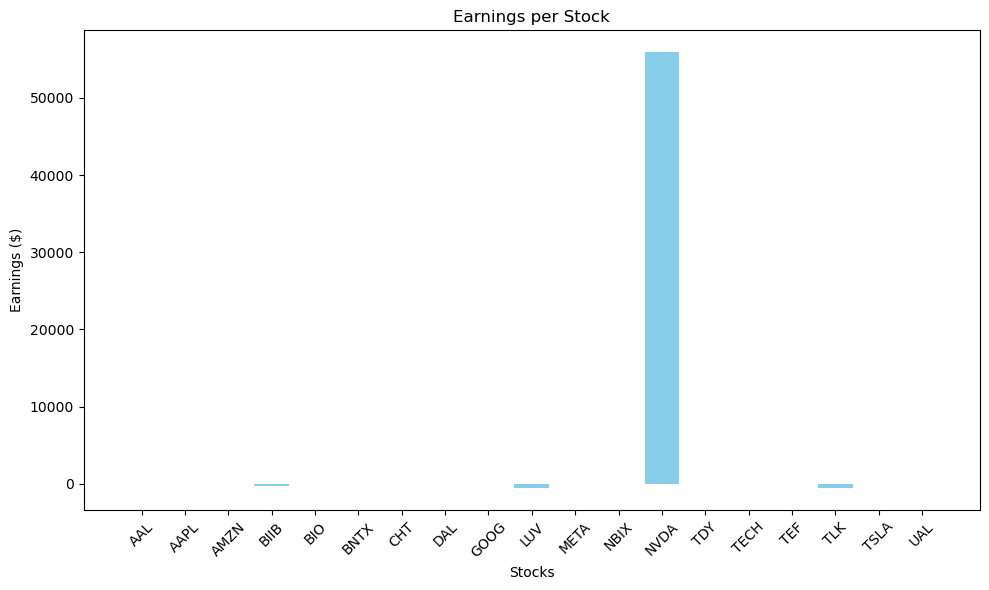

<Figure size 640x480 with 0 Axes>

In [11]:
visualization_bar(df_bond)

In [12]:
#Test data
stock_calculate(df_bond1)

Total earning from 2024-11-04 00:00:00 to 2024-11-22 00:00:00 is: -66.4 Dollars
Solution's runtime: 0.00 seconds

Portfolio's Total Risk: 45.90619931008859


/var/folders/28/9z57xr3n7zzbhrtphpb0p45h0000gn/T/ipykernel_87818/3364273496.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stockweight_count.append([(stock_weight[i].X)*10000 , round(stock_weight[i].X*10000 / dframe.iloc[0][i],4)])
/var/folders/28/9z57xr3n7zzbhrtphpb0p45h0000gn/T/ipykernel_87818/3364273496.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_earn += (stock_weight[i].X*10000 / dframe.iloc[0][i]) * dframe.iloc[-1][i] - stock_weight[i].X*10000


,AAL,AAPL,AMZN,BIIB,BIO,BNTX,CHT,DAL,GOOG,LUV,META,NBIX,NVDA,TDY,TECH,TEF,TLK,TSLA,UAL
0,1.240245e-07,1.661109e-09,2.564325e-09,885.746122,221.870998,1.788011e-09,8.096856e-08,9.174634e-09,1.625826e-09,1151.168939,4.015476e-10,1.042972e-08,2893.872416,1.542498e-09,5.034689e-09,0.000011,4847.341515,2.222091e-09,9.416956e-09
1,0.000000e+00,0.000000e+00,0.000000e+00,5.104600,0.601400,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,38.487800,0.000000e+00,0.000000e+00,21.272100,0.000000e+00,0.000000e+00,0.000000,273.861100,0.000000e+00,0.000000e+00


/var/folders/28/9z57xr3n7zzbhrtphpb0p45h0000gn/T/ipykernel_87818/3364273496.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_earnings = [((stock_weight[i].X * 10000 / dframe.iloc[0][i]) * dframe.iloc[-1][i] - stock_weight[i].X * 10000) for i in range(len(stock_names))]


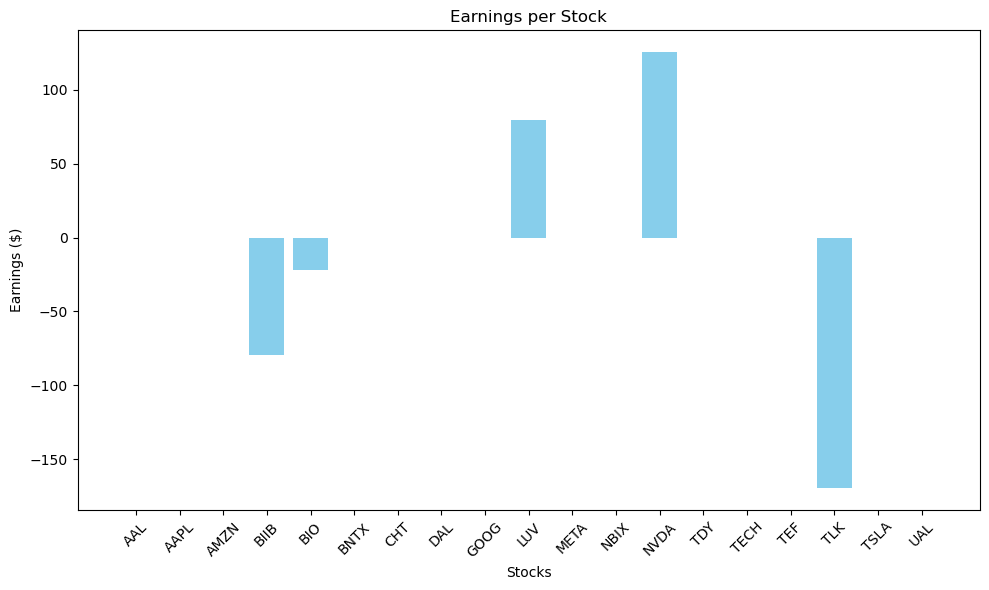

<Figure size 640x480 with 0 Axes>

In [13]:
visualization_bar(df_bond1)

### 2. MAD Implementation - Second Model

Our second apporach is the main design in our research, where we in maximize the return of our portfolio. In 

**Decision variables:** 

$w_i$: the portfolio's pertial amount invested in stock $i$

**Objective function:** Maximize the return of the portfolio: 

$$\text{Maximize } \sum_{i=1}^n R_i \cdot w_i$$

1. **Risk Constraint:**
$$
\sum_{i=1}^n \sum_{j=1}^n cov_{i,j} \cdot w_i \cdot w_j \leq \text{RiskLimit}
$$

2. **Budget Constraint:**
$$
\sum_{i=1}^n w_i = 1
$$

3. **Non-Negativity Constraint:**
$$
w_i \geq 0, \quad \forall i
$$

4. To ensure minimum level of risk: 

    $$\text{MAD} \leq c $$
    
**Where:**

- $R_i$: The expected rate of return for stock $i$.
- $cov_{i,j}$: The covariance between stocks $i$ and $j$.
- $\text{RiskLimit}$: The maximum allowable portfolio risk (variance).
- $w_i$ & $w_j$: The decision variable representing the portfolio proportion invested in stock $i$ and $j$ ($i \neq j$).


#### Train Set

Expected return:  13001.639189
Variance:         3.500000
Solution time:    0.00 seconds

Number of trades: 6

Ticker
BIIB     244.321637
BIO       65.913599
LUV      158.610092
NVDA     707.797673
TEF     7524.092185
TLK     1299.264796
Name: Position, dtype: float64


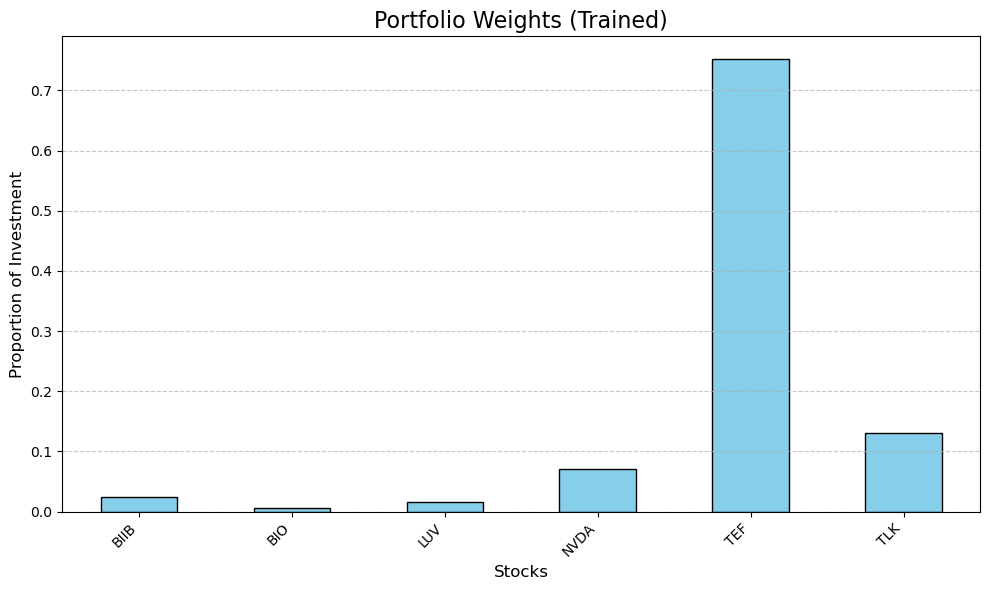

Number of trades: 6

Ticker
BIIB     244.321637
BIO       65.913599
LUV      158.610092
NVDA     707.797673
TEF     7524.092185
TLK     1299.264796
Name: Position, dtype: float64


In [14]:
V = 3.5  # maximal admissible variance (sigma^2)

# Model setup: Maximize return for a given level of risk
stock_mod1 = gp.Model("Stock Return Maximization")
stock_mod1.Params.LogToConsole = 0

# Add variables: x[i] denotes the proportion invested in stock i
# 0 <= x[i] <= 1
x = stock_mod1.addMVar(len(returns), lb=0, ub=1, name="x")

# Budget constraint: all investments sum up to 1
stock_mod1.addConstr(x.sum() == 1, name="Budget_Constraint")

# Limit on variance
risk_constr = stock_mod1.addConstr(x @ mat_cov_array @ x <= V, name="Variance")

# Define objective function: Maximize expected return
stock_mod1.setObjective(returns.to_numpy() @ x, gp.GRB.MAXIMIZE)
stock_mod1.optimize()

print(f"Expected return:  {stock_mod1.ObjVal*10000:.6f}")
print(f"Variance:         {x.X @ mat_cov_array @ x.X:.6f}")
print(f"Solution time:    {stock_mod1.Runtime:.2f} seconds\n")

# Print investments (with non-negligible values, i.e., > 1e-5)
positions = pd.Series(name="Position", data=x.X, index=returns.index)
print(f"Number of trades: {positions[positions > 1e-5].count()}\n")
print(positions[positions > 1e-5]*10000)


# Visualization of portfolio weights
positions = pd.Series(name="Position", data=x.X, index=returns.index)
significant_positions = positions[positions > 1e-5]  # Filter non-negligible investments

# Plotting the portfolio weights
plt.figure(figsize=(10, 6))
significant_positions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Portfolio Weights (Trained)", fontsize=16)
plt.ylabel("Proportion of Investment", fontsize=12)
plt.xlabel("Stocks", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print summary details
print(f"Number of trades: {significant_positions.count()}\n")
print(significant_positions*10000)

#### Test Set

Expected return:  421.098588
Variance:         3.500000
Solution time:    0.00 seconds

Number of trades: 4

Ticker
AAL     4578.719538
CHT     2832.452199
NBIX     584.075593
TEF     2004.752447
Name: Position, dtype: float64


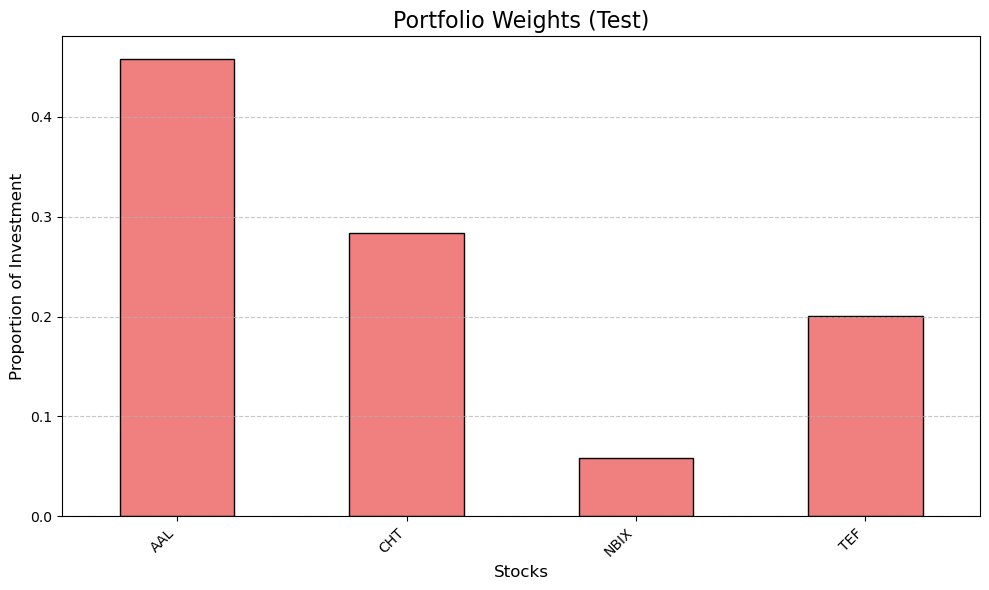

Number of trades: 4

Ticker
AAL     4578.719538
CHT     2832.452199
NBIX     584.075593
TEF     2004.752447
Name: Position, dtype: float64


In [15]:
V = 3.5  # maximal admissible variance (sigma^2)

# Model setup: Maximize return for a given level of risk
stock_mod2 = gp.Model("Stock Return Maximization")
stock_mod2.Params.LogToConsole = 0

# Add variables: x[i] denotes the proportion invested in stock i
# 0 <= x[i] <= 1
x = stock_mod2.addMVar(len(returns_test), lb=0, ub=1, name="x")

# Budget constraint: all investments sum up to 1
stock_mod2.addConstr(x.sum() == 1, name="Budget_Constraint")

# Limit on variance
risk_constr = stock_mod2.addConstr(x @ mat_cov_array_test @ x <= V, name="Variance")

# Define objective function: Maximize expected return
stock_mod2.setObjective(returns_test.to_numpy() @ x, gp.GRB.MAXIMIZE)
stock_mod2.optimize()

print(f"Expected return:  {stock_mod2.ObjVal*10000:.6f}")
print(f"Variance:         {x.X @ mat_cov_array_test @ x.X:.6f}")
print(f"Solution time:    {stock_mod2.Runtime:.2f} seconds\n")

# Print investments (with non-negligible values, i.e., > 1e-5)
positions_test = pd.Series(name="Position", data=x.X, index=returns_test.index)
print(f"Number of trades: {positions_test[positions_test > 1e-5].count()}\n")
print(positions_test[positions_test > 1e-5]*10000)


# Filter non-negligible investments (e.g., > 1e-5)
significant_positions_test = positions_test[positions_test > 1e-5]

# Visualization of portfolio weights
positions = pd.Series(name="Position", data=x.X, index=returns.index)
significant_positions = positions[positions > 1e-5]  # Filter non-negligible investments

# Plot the portfolio weights
plt.figure(figsize=(10, 6))
significant_positions_test.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Portfolio Weights (Test)", fontsize=16)
plt.ylabel("Proportion of Investment", fontsize=12)
plt.xlabel("Stocks", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print summary details
print(f"Number of trades: {significant_positions_test.count()}\n")
print(significant_positions_test * 10000)

We have shown the portfolio weight allocations for both trained and test datasets, respectively, by following modified MPT to find the difference of the output results and how the non-linear risk constraints impact the modified MPT formulation of maximized expected return. For both of the datasets, the number of trade is 6, **Variance is 3.5** and the solution's runtime is 0.00 seconds.
For the trained dataset, we have received **Expected return =  13000.679266**, and for the test dataset, we have received **Expected return =  421.098594**. 

### 3. MAD Implementation - Third Model (with MAD linearization)

Our third apporach is to add 1 more layer of Mean Absolute Deviation (MAD) to our second model as a risk measurement. This work implies: Reward = Expected Return - Risk Penalty.

**Decision variables:**

$w_i$: the portfolio's pertial amount invested in stock $i$


**Objective function:** 
MAD formulation: 

$$
\textbf{Maximize} \quad \sum_{i \in I} R_i \cdot w_i - \lambda \sum_{t \in T} p_t (d_{t}^{+} + d_{t}^{-})
$$

**Where:**

- $R_i$: The expected rate of return for stock $i$.
- $w_i$: The decision variable representing the portfolio proportion invested in stock $i$.
- $\lambda$: The risk aversion coefficient.
- $p_t$: The probability of scenario $t$ occurring.
- $d_{t}^{+}$ and $d_{t}^{-}$: The positive and negative deviations from the expected portfolio return in scenario $t$.


1. **Constraints:**

- First Constraint: To measure the deviation of each scenario return from the expected portfolio return, we
introduce the deviation constraints for Mean Absolute Deviation (MAD):
$$d_{t}^{+} - d_{t}^{-} = \sum_{i \in I} w_i (R_i - r_{i,t}), \ \forall t \in T$$

- The Second Constraint: To enforce a fully invested, long-only portfolio, we introduce the weight constraints:

$$ \sum_{i \in I} w_i = 1 , \ w_i \ \geq 0,\ \forall i \in I $$


- The Third Constraint: To ensure minimum level of risk:
    $$\text{MAD} \leq c $$

In MAD formulation, it measures the average absolute deviation which implies that the deviations must be non-negative. As all scenario provides identical returns, for $c=0$, there will be no deviation which is unrealistic. To ensure the feasibility of our optimization problem, we can bound $c$ as $0 < c \leq max_t \left(d_t^+ - d_t^- \right) $.

where:

- $d_{t}^{+}$ and $d_{t}^{-}$ capture deviations of scenario returns above and below the expected return, respectively.
- Both deviation variables must be non-negative to ensure valid MAD calculation:
$$ d_{t}^{+} \geq 0, \ d_{t}^{-} \geq 0, \ \forall t \in T $$
- $\sum_{i \in I} w_i = 1$, The total portfolio weight equals 1 (full investment).
- $\ w_i \ \geq 0$ prevents short-selling, assuming a long-only portfolio.
\end{itemize}

[*********************100%%**********************]  19 of 19 completed
/var/folders/28/9z57xr3n7zzbhrtphpb0p45h0000gn/T/ipykernel_87818/1962836988.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expected_return = gp.quicksum(w[i] * returns[i] for i in range(I))
/var/folders/28/9z57xr3n7zzbhrtphpb0p45h0000gn/T/ipykernel_87818/1962836988.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w[i] * (returns[i] - scenario_returns[t][i]) for i in range(I)


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.1.0 24B91)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1233 rows, 2481 columns and 28332 nonzeros
Model fingerprint: 0x90d0f762
Coefficient statistics:
  Matrix range     [6e-06, 1e+00]
  Objective range  [4e-04, 8e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-02, 1e+00]
Presolve removed 20 rows and 40 columns
Presolve time: 0.01s
Presolved: 1213 rows, 2441 columns, 27891 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.9455788e-01   1.206922e+02   0.000000e+00      0s
    1276    9.7764227e-03   0.000000e+00   0.000000e+00      0s

Solved in 1276 iterations and 0.14 seconds (0.39 work units)
Optimal objective  9.776422693e-03
Optimal portfolio weights:
Stock TSLA: 0.0494
Stock LUV: 0.5834
Stock BNTX: 0.0857
Stock TLK: 0.0196
Stock TEF: 0.2619
Expected Portfolio Return: 197.7642

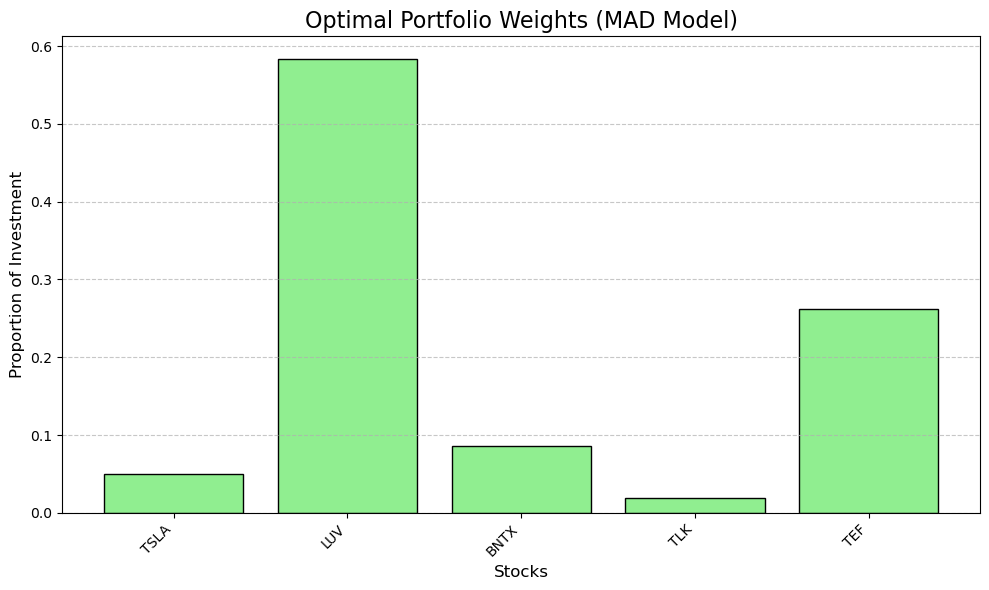

In [16]:
# Input data
# Fetch historical data (last 2 years of daily prices)
data = yf.download(companies, start="2020-01-01", end="2024-11-22")['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Compute expected returns (mean of daily returns scaled to annual) - Expected returns for each stock (array of size I)
returns = daily_returns.mean() * 252  # Assuming 252 trading days in a year

# Simulate scenarios using historical daily returns
scenario_returns = daily_returns.values  # Matrix of scenario returns (size T x I) - Use daily returns as scenarios
scenario_probabilities = np.full(len(scenario_returns), 1 / len(scenario_returns))  # Probabilities of each scenario (array of size T)
 
lambda_ = 0.5  # Risk-return tradeoff parameter
risk_limit = 0.02  # Maximum allowable MAD

I = len(returns)  # Number of stocks
T = len(scenario_returns)  # Number of scenarios

# Create Gurobi MAD model
stock_mod_MAD = gp.Model("MAD_Portfolio")

# Decision variables
w = stock_mod_MAD.addVars(I, lb=0.0, ub=1.0, name="weights")  # Portfolio weights
d_plus = stock_mod_MAD.addVars(T, lb=0.0, name="d_plus")  # Positive deviations
d_minus = stock_mod_MAD.addVars(T, lb=0.0, name="d_minus")  # Negative deviations

# Expected portfolio return
expected_return = gp.quicksum(w[i] * returns[i] for i in range(I))

# Mean Absolute Deviation (MAD)
MAD = gp.quicksum(
    scenario_probabilities[t] * (d_plus[t] + d_minus[t]) for t in range(T)
)

# Objective function: Maximize risk-adjusted return
stock_mod_MAD.setObjective(expected_return - lambda_ * MAD, GRB.MAXIMIZE)

# Constraints
# First Constraint: Deviation constraints
for t in range(T):
    stock_mod_MAD.addConstr(
        d_plus[t] - d_minus[t] == gp.quicksum(
            w[i] * (returns[i] - scenario_returns[t][i]) for i in range(I)
        ),
        name=f"Deviation_{t}"
    )

# Second Constraint: Fully invested, long-only portfolio
stock_mod_MAD.addConstr(gp.quicksum(w[i] for i in range(I)) == 1, "Budget")

# Third Constraint: Limit on MAD
stock_mod_MAD.addConstr(MAD <= risk_limit, "RiskLimit")

# Optimize model
stock_mod_MAD.optimize()

# Display results and visualize portfolio weights
if stock_mod_MAD.status == GRB.OPTIMAL:
    # Extract optimal weights
    optimal_weights = {companies[i]: w[i].x for i in range(I) if w[i].x > 1e-5}

    # Print results
    print("Optimal portfolio weights:")
    for stock, weight in optimal_weights.items():
        print(f"Stock {stock}: {weight:.4f}")
    print(f"Expected Portfolio Return: {expected_return.getValue()*10000:.4f}")
    print(f"Mean Absolute Deviation (MAD): {MAD.getValue():.4f}")

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.bar(optimal_weights.keys(), optimal_weights.values(), color='lightgreen', edgecolor='black')
    plt.title("Optimal Portfolio Weights (MAD Model)", fontsize=16)
    plt.ylabel("Proportion of Investment", fontsize=12)
    plt.xlabel("Stocks", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()

else:
    print("No optimal solution found.")


The chart represents the main model formulation of linearized portfolio optimization using MAD(Mean Absolute Deviation). In this case, we get \textbf{the Objective Value of 9.776422101e-03} represents the best trade-off between return and risk based on the defined reward function. This function incorporates both the expected return and the penalty for deviations (MAD) scaled by the risk aversion parameter $\lambda$. The allocation of weights reflects the optimal investment distribution across the five assets to achieve this trade-off in percentage with respect to the budget constraints. The optimal portfolio weights are: Stock TSLA: 0.0494 ($4.94 \% $), Stock LUV: 0.5834 ($58.34 \% $), Stock BNTX: 0.0857 ($8.57 \% $), Stock TLK: 0.0196 ($1.96 \% $), Stock TEF: 0.2619 ($26.19 \% $).
The portfolio achieves an **Expected Return of 0.0198 (approximately $1.98 \% $)** with a \textbf{MAD risk of 0.0200 (approximately $2.00 \% $)}. The entire process has solved in 1276 iterations and 0.10 seconds (0.39 work units). Therefore, the results demonstrate the model's ability to navigate the risk-return trade-offs ($\lambda =0.5$) in risk-sensitive portfolio optimization with risk limit ($c = 0.02$).

[*********************100%%**********************]  19 of 19 completed
/var/folders/28/9z57xr3n7zzbhrtphpb0p45h0000gn/T/ipykernel_87818/2425786161.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expected_return = gp.quicksum(w[i] * returns[i] for i in range(I))
/var/folders/28/9z57xr3n7zzbhrtphpb0p45h0000gn/T/ipykernel_87818/2425786161.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w[i] * (returns[i] - scenario_returns[t][i]) for i in range(I)


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.1.0 24B91)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1233 rows, 2481 columns and 28332 nonzeros
Model fingerprint: 0x66827cad
Coefficient statistics:
  Matrix range     [6e-06, 1e+00]
  Objective range  [8e-06, 8e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-02, 1e+00]
Presolve removed 20 rows and 40 columns
Presolve time: 0.01s
Presolved: 1213 rows, 2441 columns, 27891 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.0144245e-01   1.206922e+02   0.000000e+00      0s
    1285    1.9576423e-02   0.000000e+00   0.000000e+00      0s

Solved in 1285 iterations and 0.10 seconds (0.38 work units)
Optimal objective  1.957642269e-02
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.1.0 24B91)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical p

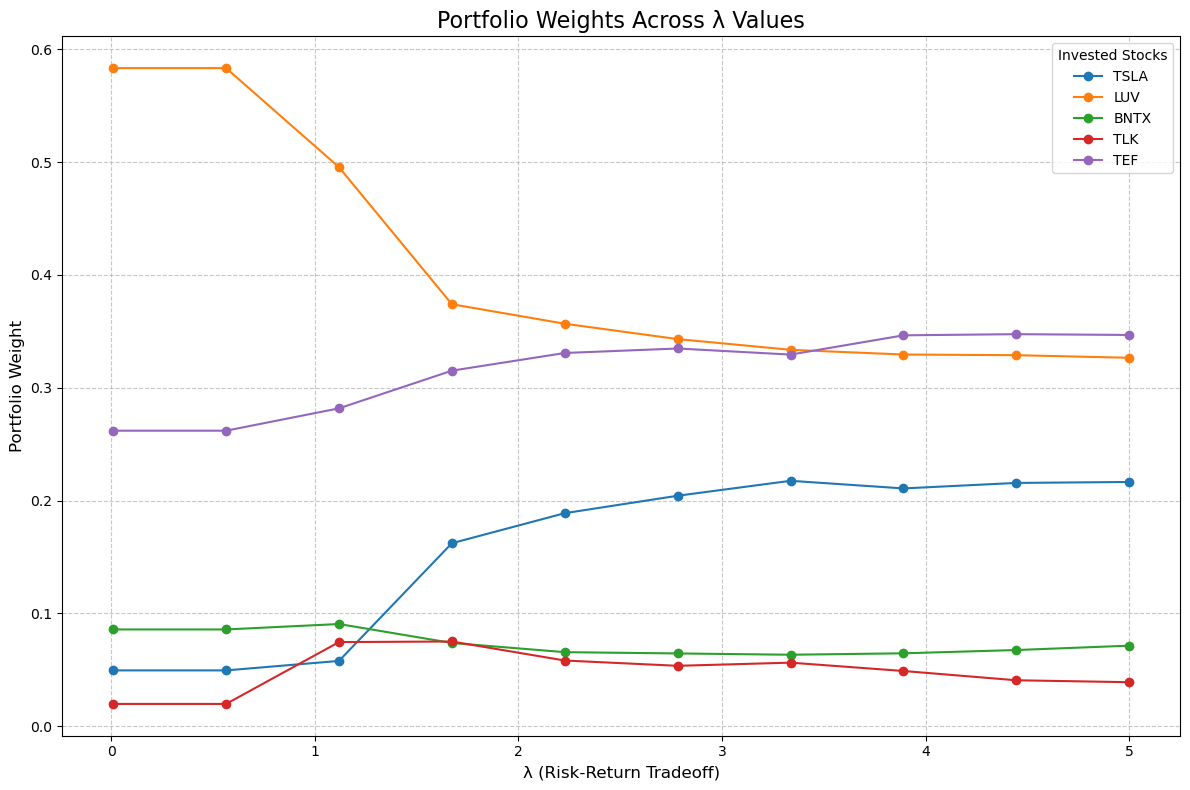

In [17]:
# Input data
data = yf.download(companies, start="2020-01-01", end="2024-11-22")['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Compute expected returns (mean of daily returns scaled to annual) - Expected returns for each stock (array of size I)
returns = daily_returns.mean() * 252  # Assuming 252 trading days in a year

# Simulate scenarios using historical daily returns
scenario_returns = daily_returns.values  # Matrix of scenario returns (size T x I) - Use daily returns as scenarios
scenario_probabilities = np.full(len(scenario_returns), 1 / len(scenario_returns))  # Probabilities of each scenario (array of size T)

risk_limit = 0.02  # Maximum allowable MAD

I = len(returns)  # Number of stocks
T = len(scenario_returns)  # Number of scenarios

lambda_values = np.linspace(0.01, 5, 10)  # Range of lambda values
results_MAD = []

for lambda_ in lambda_values:
    # Create Gurobi MAD model
    stock_mod_MAD = gp.Model("MAD_Portfolio")

    # Decision variables
    w = stock_mod_MAD.addVars(I, lb=0.0, ub=1.0, name="weights")  # Portfolio weights
    d_plus = stock_mod_MAD.addVars(T, lb=0.0, name="d_plus")  # Positive deviations
    d_minus = stock_mod_MAD.addVars(T, lb=0.0, name="d_minus")  # Negative deviations

    # Expected portfolio return
    expected_return = gp.quicksum(w[i] * returns[i] for i in range(I))

    # Mean Absolute Deviation (MAD)
    MAD = gp.quicksum(
        scenario_probabilities[t] * (d_plus[t] + d_minus[t]) for t in range(T)
    )

    # Objective function: Maximize risk-adjusted return
    stock_mod_MAD.setObjective(expected_return - lambda_ * MAD, GRB.MAXIMIZE)

    # Constraints
    # First Constraint: Deviation constraints
    for t in range(T):
        stock_mod_MAD.addConstr(
            d_plus[t] - d_minus[t] == gp.quicksum(
                w[i] * (returns[i] - scenario_returns[t][i]) for i in range(I)
            ),
            name=f"Deviation_{t}"
        )

    # Second Constraint: Fully invested, long-only portfolio
    stock_mod_MAD.addConstr(gp.quicksum(w[i] for i in range(I)) == 1, "Budget")

    # Third Constraint: Limit on MAD
    stock_mod_MAD.addConstr(MAD <= risk_limit, "RiskLimit")

    # Optimize model
    stock_mod_MAD.optimize()

    if stock_mod_MAD.status == GRB.OPTIMAL:
        # Extract optimal weights
        optimal_weights = {companies[i]: w[i].x for i in range(I) if w[i].x > 1e-5}

        # Store results
        results_MAD.append({
            "lambda": lambda_,
            "expected_return": expected_return.getValue(),
            "MAD": MAD.getValue(),
            "weights": optimal_weights
        })

# Visualize results for different lambda values
# Extract data for line graph
lambda_values_plot = [result["lambda"] for result in results_MAD]
weights_plot = {stock: [] for stock in companies}

# Populate weights for each stock
for result in results_MAD:
    for stock in companies:
        weights_plot[stock].append(result["weights"].get(stock, 0))  # Append weight or 0 if not present

# Filter stocks that have non-zero weights across any λ value
invested_stocks = {stock for stock, weights in weights_plot.items() if any(w > 1e-5 for w in weights)}

# Plot line graph
plt.figure(figsize=(12, 8))
for stock, weights in weights_plot.items():
    if stock in invested_stocks:  # Only plot stocks we are investing in
        plt.plot(lambda_values_plot, weights, marker='o', label=stock)

# Add titles and labels
plt.title("Portfolio Weights Across λ Values", fontsize=16)
plt.xlabel("λ (Risk-Return Tradeoff)", fontsize=12)
plt.ylabel("Portfolio Weight", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Invested Stocks", fontsize=10)
plt.grid(linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Explanation: The chart illustrates how portfolio weights change across different values of the risk-return tradeoff parameter, $\lambda$.  On the $x$-axis, $\lambda$ reflects the balance between return and risk, with smaller values ensuring returns and larger values emphasizing risk minimization (as measured by MAD). The $y$-axis indicates the proportion of the portfolio invested in each stock, with each line representing a stock actively included in the portfolio for at least one $\lambda$ value. Stocks with zero allocation across all $\lambda$ values are excluded from both the plot and the legend.  A horizontal line suggests consistent allocation to a stock regardless of risk-return preference. A decline in weights for increasing $\lambda$ value suggests a preference for less risky stocks, aligning with a more conservative investment strategy. The chart effectively captures the balance between risk and return, revealing the dynamic shifts in portfolio composition as $\lambda$ varies, and provides a clear visualization of how diversification and risk preferences influence investment decisions.

### 4. MAD Implementation - Forth Model (with MAD and Gradient Descent Policy Update)

An RL agent iteratively updates weights based on rewards from previous allocations, aiming to optimize cumulative returns dynamically. Here’s the iterative approach:
\begin{itemize}
- **Initialize Portfolio Weights:** Start with an initial allocation $w_i$ and compute initial returns $y_t$ using scenario-based returns $r_{i,t}$.
- **Define the Reward Function:** This reward indicates how well the current weight configuration aligns with desired returns and risk tolerance. The reward function is based on the portfolio’s return minus risk:

$$\text{Reward}(t)=\sum_{i \in I} R_i w_i - \lambda \sum_{t \in T} p_t (d_{t}^{+} + d_{t}^{-})$$

   
- **Policy Function - Gradient Descent Update:**

    - **1.** Use constrained gradient descent to adjust weights iteratively, taking the gradient of the reward function:


    $$ 
    \nabla_{w_i} = \frac{\partial}{\partial w_i} 
    \left(\sum_{i \in I} R_i w_i - \lambda \sum_{t \in T} p_t (d_{t}^{+} + d_{t}^{-})\right)
    $$


    - **2.** Update weights in the direction of the gradient:




    $$ w_i \leftarrow w_i + \alpha \cdot \nabla_{w_i} \ , \; \text{where} \; \alpha \; \text{is a learning rate.}$$


- **Projection Step to Satisfy Constraints:** Project weights back into the feasible region by ensuring non-negativity and normalizing:

$$ w_i = max(0,w_i), \; \; w_i= \frac{w_i}{\sum_i w_i}$$

- **Iteration:** Repeat steps until the reward function stabilizes or reaches a maximum, meaning optimal weights are found based on cumulative returns and penalties.

In [18]:
# Input data
np.random.seed(42)  # For reproducibility

# Fetch historical data (last 2 years of daily prices)
data = yf.download(companies, start="2020-01-01", end="2024-11-22")['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Compute expected returns (mean of daily returns scaled to annual) - Expected returns for each stock (array of size I)
returns = daily_returns.mean() * 252  # Assuming 252 trading days in a year

# Simulate scenarios using historical daily returns
scenario_returns = daily_returns.values  # Matrix of scenario returns (size T x I) - Use daily returns as scenarios
scenario_probabilities = np.full(len(scenario_returns), 1 / len(scenario_returns))  # Probabilities of each scenario (array of size T)
 

I = len(returns)  # Number of stocks
T = len(scenario_returns)  # Number of scenarios
# Compute expected returns (mean of daily returns scaled to annual) - Expected returns for each stock (array of size I)
returns = daily_returns.mean() * 252  # Assuming 252 trading days in a year

# Simulate scenarios using historical daily returns
scenario_returns = daily_returns.values  # Matrix of scenario returns (size T x I) - Use daily returns as scenarios
scenario_probabilities = np.full(len(scenario_returns), 1 / len(scenario_returns))  # Probabilities of each scenario (array of size T)


# Initialize parameters
lambda_ = 0.5  # Risk-return tradeoff parameter
alpha = 0.01  # Learning rate
max_iter = 1000  # Maximum number of iterations
tolerance = 1e-6  # Convergence threshold

# Initialize weights
weights = np.ones(I) / I  # Start with equal weights

# Define the reward function and gradient
def reward_function(weights, returns, scenario_returns, scenario_probabilities, lambda_):
    """
    Computes the reward: expected return minus risk penalty (MAD-based).
    """
    # Expected portfolio return
    expected_return = np.dot(weights, returns)
    
    # Mean Absolute Deviation (MAD)
    deviations = scenario_returns @ weights - expected_return
    MAD = np.dot(scenario_probabilities, np.abs(deviations))
    
    # Reward
    reward = expected_return - lambda_ * MAD
    return reward

def gradient(weights, returns, scenario_returns, scenario_probabilities, lambda_):
    """
    Computes the gradient of the reward function with respect to the weights.
    """
    # Gradients for expected return
    grad_expected_return = returns
    
    # Gradients for MAD
    deviations = scenario_returns @ weights - np.dot(weights, returns)
    grad_deviations = scenario_returns.T @ (scenario_probabilities * np.sign(deviations))
    grad_MAD = grad_deviations
    
    # Total gradient
    grad = grad_expected_return - lambda_ * grad_MAD
    return grad

# Gradient descent optimization
for iteration in range(max_iter):
    # Compute the gradient
    grad = gradient(weights, returns, scenario_returns, scenario_probabilities, lambda_)
    
    # Update weights
    weights += alpha * grad
    
    # Projection step: Ensure non-negativity and normalization
    weights = np.maximum(0, weights)  # Enforce non-negativity
    weights /= np.sum(weights)  # Normalize to sum to 1
    
    # Check convergence
    reward = reward_function(weights, returns, scenario_returns, scenario_probabilities, lambda_)
    if iteration > 0 and np.abs(reward - prev_reward) < tolerance:
        print(f"Converged at iteration {iteration}")
        break
    
    prev_reward = reward

# Display results
print("Optimal weights:", weights)
print("Final reward:", reward)
print("Expected return:", np.dot(weights, returns))
print("Mean Absolute Deviation (MAD):", np.dot(scenario_probabilities, np.abs(scenario_returns @ weights - np.dot(weights, returns))))


[*********************100%%**********************]  19 of 19 completed


Converged at iteration 213
Optimal weights: Ticker
AAL     0.011249
AAPL    0.072680
AMZN    0.055090
BIIB    0.000000
BIO     0.009348
BNTX    0.132469
CHT     0.011456
DAL     0.036042
GOOG    0.060806
LUV     0.000000
META    0.078057
NBIX    0.024724
NVDA    0.204263
TDY     0.028614
TECH    0.031481
TEF     0.005151
TLK     0.000000
TSLA    0.186457
UAL     0.052112
dtype: float64
Final reward: 0.23431586300101148
Expected return: 0.466779426689762
Mean Absolute Deviation (MAD): 0.4649271273775011


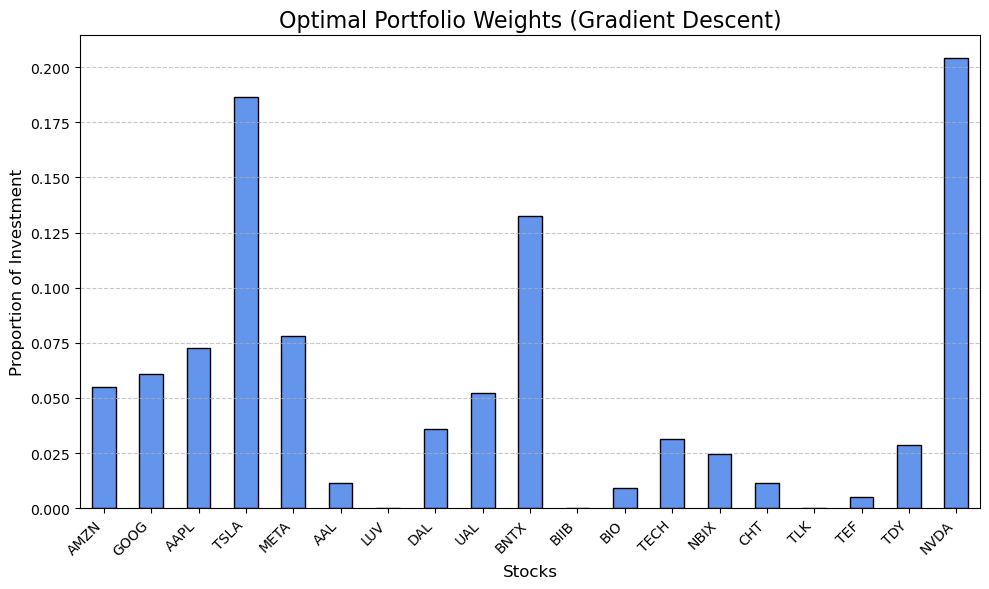

In [19]:
# Visualization of portfolio weights
optimal_weights = pd.Series(weights, index=companies)

plt.figure(figsize=(10, 6))
optimal_weights.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title("Optimal Portfolio Weights (Gradient Descent)", fontsize=16)
plt.ylabel("Proportion of Investment", fontsize=12)
plt.xlabel("Stocks", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

we have shown the allocation of weights for each of the stocks by implementing the linearized MAD model of portfolio optimization with gradient descent. Our result has demonstrated the model's ability to navigate risk-return trade-offs ($\lambda =0.5$) with learning rate $\alpha=0.01$ and convergence threshold $ = 1e-6$. The process takes \textbf{213 number of iterations}. The optimal portfolio weights of each of the stocks are- AAL (0.011249), AAPL (0.072680), AMZN (0.055090), BIIB (0.000000), BIO (0.009348), BNTX (0.132469), CHT (0.011456), DAL (0.036042), GOOG (0.060806), LUV (0.000000), META (0.078057), NBIX (0.024724), NVDA (0.204263), TDY (0.028614), TECH (0.031481), TEF (0.005151), TLK (0.000000), TSLA (0.186457), UAL (0.052112). Our **final Outputs** are:

Final reward: 0.23431586772177804 
Expected return: 0.4667794360939765 
Mean Absolute Deviation (MAD): 0.4649271367443969 

We can see the significance of adding gradient descent in our model, which has lessened the number of iterations and at the same time, the reward reflects the balance between a reasonable return while keeping the risk (MAD) within acceptable bounds. 

### Change in Lambda

In [20]:
# Input data
np.random.seed(42)  # For reproducibility

# Fetch historical data (last 4 years of daily prices)
data = yf.download(companies, start="2020-01-01", end="2024-11-22")['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Compute expected returns (mean of daily returns scaled to annual)
returns = daily_returns.mean() * 252  # Assuming 252 trading days in a year

# Simulate scenarios using historical daily returns
scenario_returns = daily_returns.values  # Matrix of scenario returns (size T x I)
scenario_probabilities = np.full(len(scenario_returns), 1 / len(scenario_returns))  # Equal probabilities

I = len(returns)  # Number of stocks
T = len(scenario_returns)  # Number of scenarios

# Gradient-based optimization parameters
alpha = 0.01  # Learning rate
max_iter = 1000  # Maximum iterations
tolerance = 1e-6  # Convergence threshold

# Define the reward function and gradient
def reward_function(weights, returns, scenario_returns, scenario_probabilities, lambda_):
    expected_return = np.dot(weights, returns)
    deviations = scenario_returns @ weights - expected_return
    MAD = np.dot(scenario_probabilities, np.abs(deviations))
    return expected_return - lambda_ * MAD

def gradient(weights, returns, scenario_returns, scenario_probabilities, lambda_):
    grad_expected_return = returns
    deviations = scenario_returns @ weights - np.dot(weights, returns)
    grad_deviations = scenario_returns.T @ (scenario_probabilities * np.sign(deviations))
    grad_MAD = grad_deviations
    return grad_expected_return - lambda_ * grad_MAD

# Range of lambda values to explore
lambda_values = np.linspace(0.01, 5, 10)  # Expanded range of lambda

# Store results
results_GD = {"lambda": [], "weights": [], "expected_return": [], "MAD": []}

# Iterate over lambda values
for lambda_ in lambda_values:
    # Initialize random weights
    weights = np.random.rand(I)
    weights /= np.sum(weights)  # Normalize to sum to 1
    
    prev_reward = None
    
    # Gradient descent optimization
    for iteration in range(max_iter):
        grad = gradient(weights, returns, scenario_returns, scenario_probabilities, lambda_)
        weights += alpha * grad
        weights = np.maximum(0, weights)  # Enforce non-negativity
        weights /= np.sum(weights)  # Normalize to sum to 1
        reward = reward_function(weights, returns, scenario_returns, scenario_probabilities, lambda_)
        
        # Log gradient magnitudes for diagnostics
        if iteration == 0 or iteration % 100 == 0:
            print(f"Lambda: {lambda_:.2f}, Iter: {iteration}, Grad Magnitude: {np.linalg.norm(grad):.6f}")
        
        if prev_reward is not None and np.abs(reward - prev_reward) < tolerance:
            break
        prev_reward = reward
    
    # Calculate portfolio metrics
    expected_return = np.dot(weights, returns)
    deviations = scenario_returns @ weights - expected_return
    MAD = np.dot(scenario_probabilities, np.abs(deviations))
    
    # Store results
    results_GD["lambda"].append(lambda_)
    results_GD["weights"].append(weights)
    results_GD["expected_return"].append(expected_return)
    results_GD["MAD"].append(MAD)

# Convert results to a DataFrame
results_df = pd.DataFrame(results_GD)


[*********************100%%**********************]  19 of 19 completed


Lambda: 0.01, Iter: 0, Grad Magnitude: 1.353858
Lambda: 0.01, Iter: 100, Grad Magnitude: 1.353858
Lambda: 0.01, Iter: 200, Grad Magnitude: 1.353858
Lambda: 0.56, Iter: 0, Grad Magnitude: 1.356836
Lambda: 0.56, Iter: 100, Grad Magnitude: 1.356836
Lambda: 0.56, Iter: 200, Grad Magnitude: 1.356836
Lambda: 1.12, Iter: 0, Grad Magnitude: 1.359815
Lambda: 1.12, Iter: 100, Grad Magnitude: 1.359815
Lambda: 1.67, Iter: 0, Grad Magnitude: 1.362794
Lambda: 1.67, Iter: 100, Grad Magnitude: 1.362794
Lambda: 1.67, Iter: 200, Grad Magnitude: 1.362794
Lambda: 2.23, Iter: 0, Grad Magnitude: 1.365772
Lambda: 2.23, Iter: 100, Grad Magnitude: 1.365772
Lambda: 2.23, Iter: 200, Grad Magnitude: 1.365772
Lambda: 2.78, Iter: 0, Grad Magnitude: 1.368751
Lambda: 2.78, Iter: 100, Grad Magnitude: 1.368751
Lambda: 2.78, Iter: 200, Grad Magnitude: 1.368751
Lambda: 3.34, Iter: 0, Grad Magnitude: 1.371729
Lambda: 3.34, Iter: 100, Grad Magnitude: 1.371729
Lambda: 3.34, Iter: 200, Grad Magnitude: 1.371729
Lambda: 3.89, 

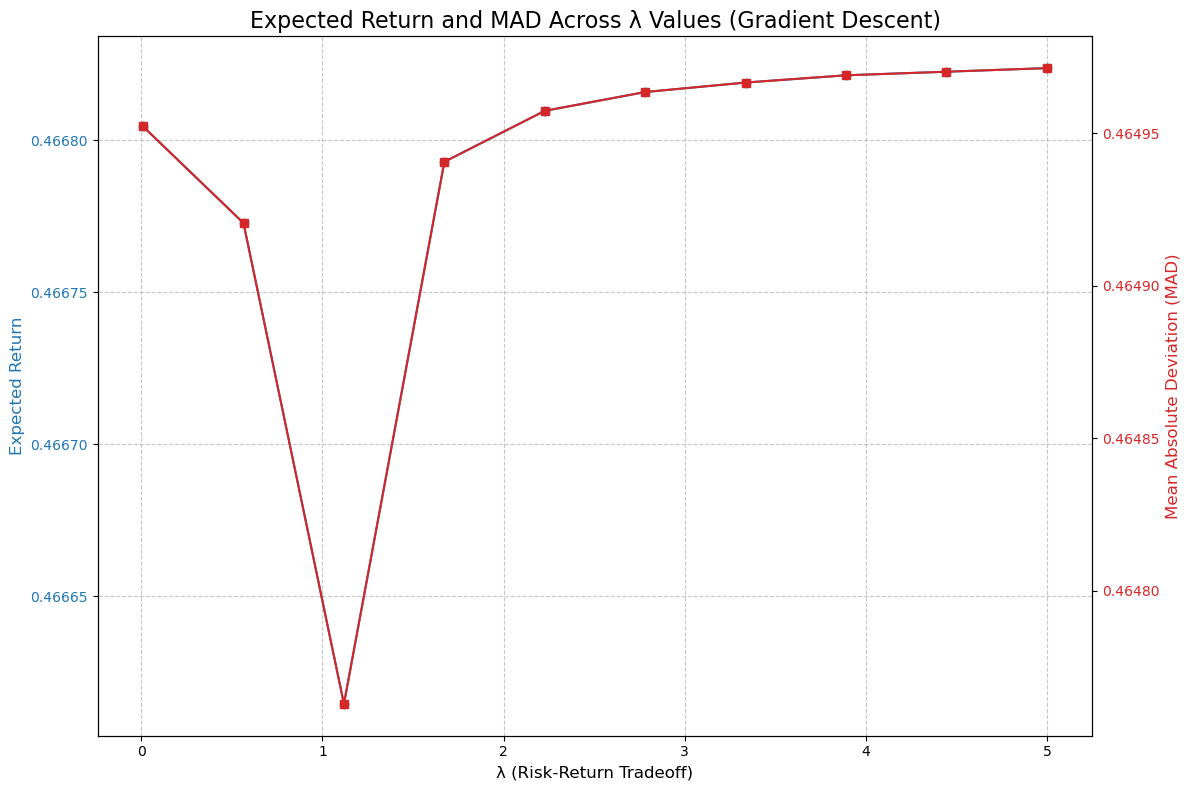

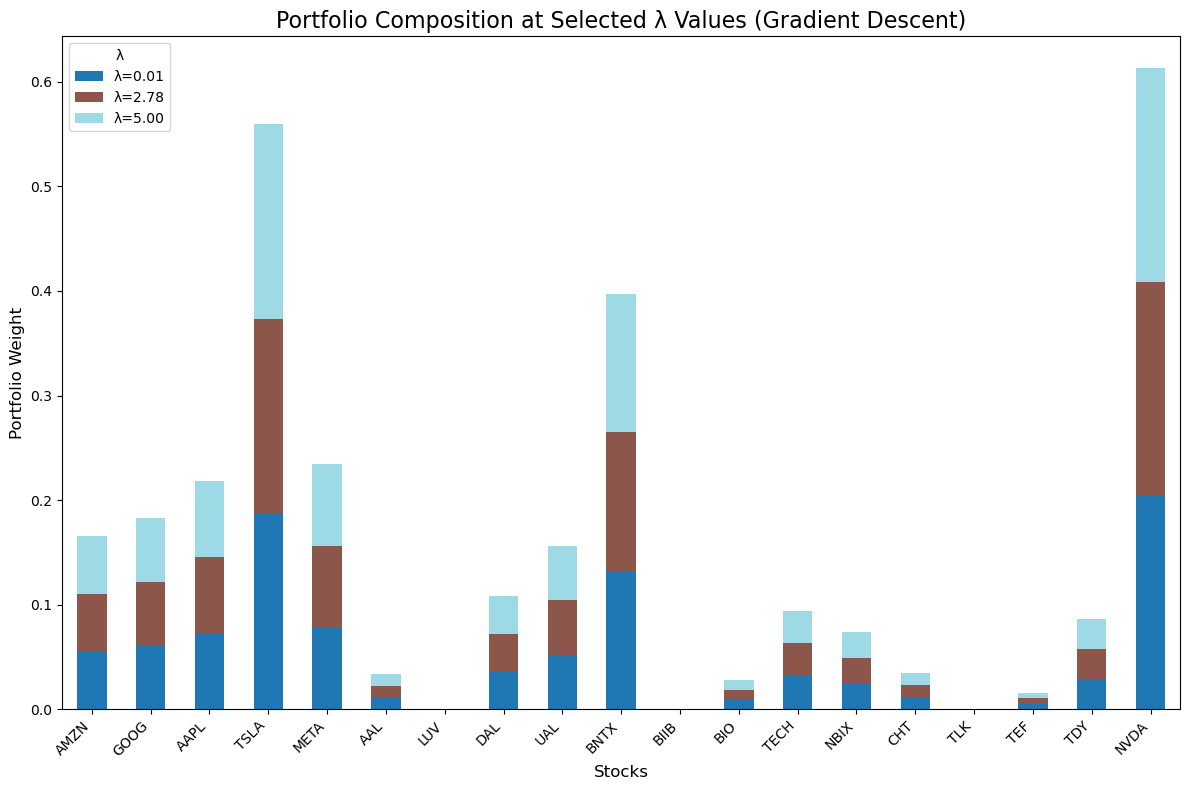

In [21]:
# Create a DataFrame for weights with lambda values as index and stocks as columns
weights_df = pd.DataFrame(results_GD["weights"], columns=companies, index=results_GD["lambda"])

# Plot expected return and MAD
fig, ax1 = plt.subplots(figsize=(12, 8))

# Expected return on left y-axis
ax1.set_xlabel("λ (Risk-Return Tradeoff)", fontsize=12)
ax1.set_ylabel("Expected Return", color="tab:blue", fontsize=12)
ax1.plot(results_GD["lambda"], results_GD["expected_return"], marker='o', color="tab:blue", label="Expected Return")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(linestyle="--", alpha=0.7)

# MAD on right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Mean Absolute Deviation (MAD)", color="tab:red", fontsize=12)
ax2.plot(results_GD["lambda"], results_GD["MAD"], marker='s', color="tab:red", label="MAD")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Title and layout
plt.title("Expected Return and MAD Across λ Values (Gradient Descent)", fontsize=16)
fig.tight_layout()
plt.show()


# Select a few lambda values to visualize composition
selected_lambdas = [lambda_values[0], lambda_values[len(lambda_values) // 2], lambda_values[-1]]
selected_indices = [results_GD["lambda"].index(lmb) for lmb in selected_lambdas]
composition_df = weights_df.iloc[selected_indices]

# Plot stacked bar chart
composition_df.T.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="tab20")
plt.title("Portfolio Composition at Selected λ Values (Gradient Descent)", fontsize=16)
plt.xlabel("Stocks", fontsize=12)
plt.ylabel("Portfolio Weight", fontsize=12)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.legend(title="λ", labels=[f"λ={lmb:.2f}" for lmb in selected_lambdas], fontsize=10)
plt.tight_layout()
plt.show()

The first chart visualizes the relationship between the expected return and mean absolute deviation (MAD) across different values of the risk-return tradeoff parameter, $\lambda$. It uses a dual $y$-axis approach, where the expected return is plotted on the left $y$-axis (in blue), and MAD is plotted on the right $y$-axis (in red). As $\lambda$ increases, the portfolio’s expected return remains relatively stable, while the MAD tends to decrease. This suggests that as the investor places more emphasis on minimizing risk (increasing $\lambda$), the overall risk (MAD) of the portfolio decreases, but at the cost of potentially sacrificing return. The chart represents the tradeoff between return and risk tolerance as we adjust $\lambda$.

The second chart focuses on the portfolio composition at three different values of $\lambda$—one at the lower end, one in the middle, and one at the higher end. We keep all the previous data of the linearized MAD model of portfolio optimization with gradient descent as similar to before except ($\lambda = 0.01, 2.78, 5.00$). Using a stacked bar chart, the portfolio weights for each stock are displayed, showing how they vary as $\lambda$ changes. At lower values of $\lambda$, the portfolio might place heavier weights on higher-risk, higher-return stocks, as the investor is more willing to accept volatility. As $\lambda$ increases, the portfolio gradually shifts towards stocks with lower risk and more stable returns. This chart provides a clear visual of how adjusting the risk-return tradeoff influences the diversification and allocation within the portfolio. The legend helps track the specific value of $\lambda$ for each set of portfolio weights.

### Comparison between MAD Linearized model and Gradient Descent MAD model

In [22]:
# MAD model results (from Gurobi optimization)
mad_lambda_values = np.linspace(0.01, 5, 10)  # Replace with actual MAD results
mad_expected_returns = [result["expected_return"] for result in results_MAD]
mad_mads = [result["MAD"] for result in results_MAD]

# Gradient Descent model results
gd_lambda_values = results_GD["lambda"]  # From Gradient Descent model
gd_expected_returns = results_GD["expected_return"]
gd_mads = results_GD["MAD"]

# Create data frame comparing MAD and Gradient Descent models
comparison_df = pd.DataFrame({
    'λ (Risk-Return Tradeoff)': mad_lambda_values,
    'MAD Model Expected Return': mad_expected_returns,
    'MAD Model MAD': mad_mads,
    'GD Model Expected Return': gd_expected_returns,
    'GD Model MAD': gd_mads
})

# Display the comparison table
comparison_df

,λ (Risk-Return Tradeoff),MAD Model Expected Return,MAD Model MAD,GD Model Expected Return,GD Model MAD
0,0.010000,0.019776,0.020000,0.466805,0.464952
1,0.564444,0.019776,0.020000,0.466773,0.464920
2,1.118889,0.016322,0.016819,0.466615,0.464763
3,1.673333,0.007856,0.010262,0.466793,0.464941
4,2.227778,0.005895,0.009220,0.466810,0.464957
5,2.782222,0.004740,0.008758,0.466816,0.464963
6,3.336667,0.004138,0.008562,0.466819,0.464967
7,3.891111,0.003667,0.008430,0.466821,0.464969
8,4.445556,0.003296,0.008340,0.466823,0.464970
9,5.000000,0.003099,0.008298,0.466824,0.464971
